# Problem Statement: To build Machine Learning model for      Flight Fare Prediction

In [1]:
## Importing libraries

In [2]:
## Reading the data
import numpy as np
import pandas as pd

In [3]:
## Visualization of the data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
## Profile Report
from pandas_profiling import ProfileReport

## Back up of Standard data
import pickle as pkl

In [5]:
## Importing libraries for Model Building and Evaluation

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.linear_model import Lasso

In [8]:
from sklearn.linear_model import Ridge

In [9]:
from sklearn.linear_model import ElasticNet

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
from sklearn.metrics import mean_absolute_error

In [12]:
from sklearn.metrics import r2_score

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
from sklearn import metrics

In [15]:
from sklearn.tree import DecisionTreeRegressor

In [16]:
from sklearn.ensemble import ExtraTreesRegressor

In [17]:
## Splitting the data into Train and Test 
from sklearn.model_selection import train_test_split

In [18]:
##  Importing RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [19]:
## Data Importing

# Train Data

In [20]:
## Reading the dataset. The dataset is in excel
data_train=pd.read_excel("C:/Users/nawin/airfare/Data_Train.xlsx")

In [21]:
## Printing the name of attributes
print("The name of columns are:", data_train.columns)

The name of columns are: Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [22]:
## Printing the number of rows and columns 
print("The number of rows and columns are:",data_train.shape)

The number of rows and columns are: (10683, 11)


In [23]:
## Displaying the first 5 rows of dataset
data_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
# Attribute Nomenclature and Information

In [25]:
## Information on dataset
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [26]:
## Profile Report 
profile = ProfileReport(data_train)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
## Displaying Statistical analysis of "Price" attribute
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [28]:
## Printing count of unique numbers
data_train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [29]:
## Checking Null values
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [30]:
# Visualization

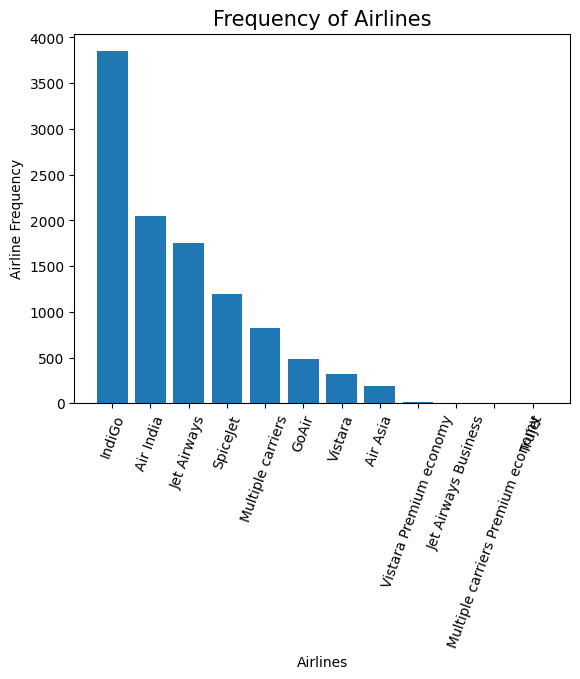

In [31]:
# Ploting graph of airline bookings to visually represent the bookings count.
plt.bar(data_train.Airline.unique(), data_train.Airline.value_counts())
plt.title("Frequency of Airlines", fontsize=15)
plt.xlabel("Airlines")
plt.ylabel("Airline Frequency")
plt.xticks(rotation=70)
plt.show()

<AxesSubplot: title={'center': 'Distribution of Price'}, xlabel='Price', ylabel='Density'>

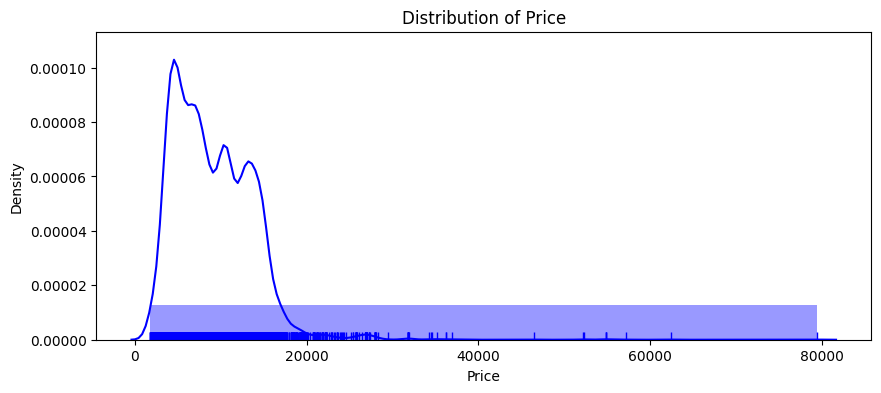

In [32]:
## Checking distribution of "Price" Feature 
plt.figure(figsize=(10,4))
plt.title('Distribution of Price')
sns.distplot(data_train['Price'],bins=1, rug=True, color='blue')

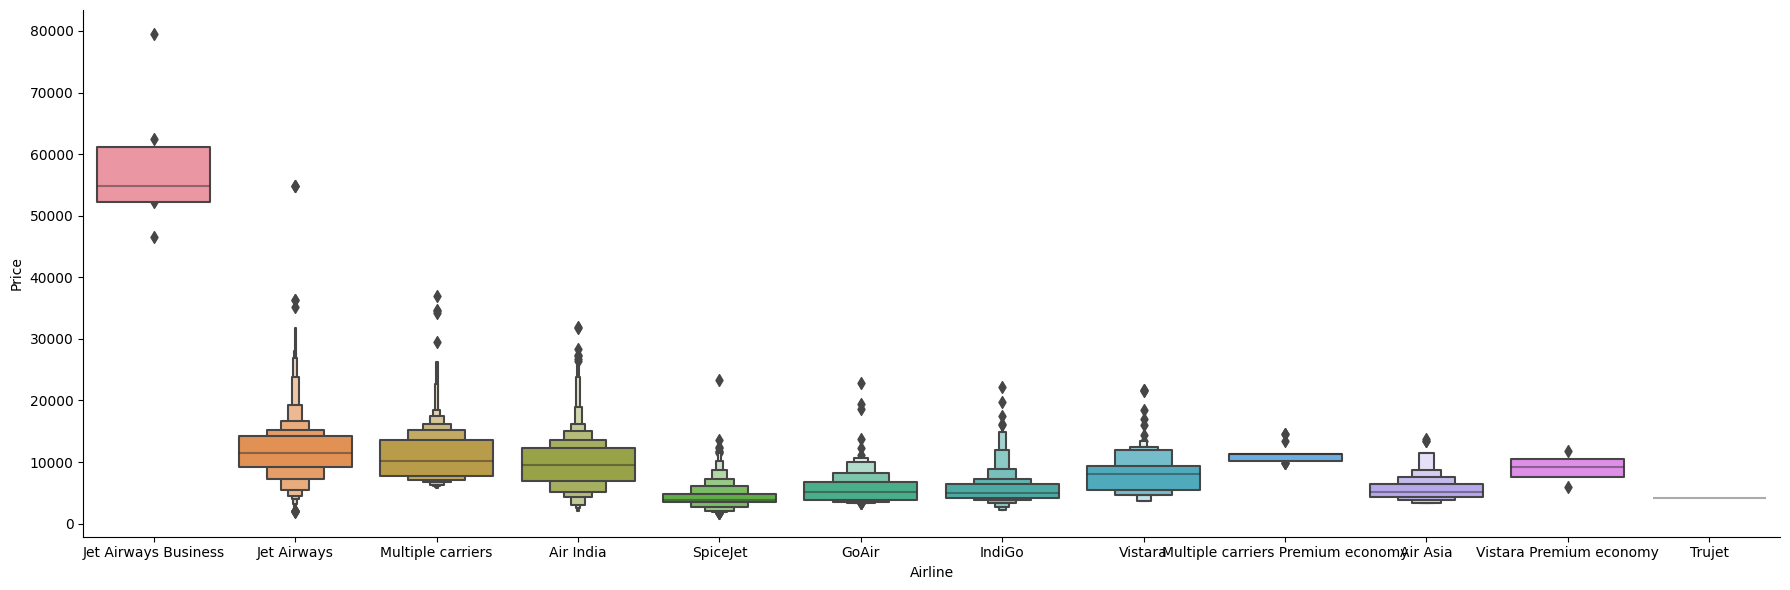

In [33]:
##   Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = data_train.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##  From graph we can see that Jet Airways Business have the highest Price.

In [34]:
## Number of Stops
stops = data_train['Total_Stops'].unique()
print("Number of stops\n", stops)

Number of stops
 ['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']


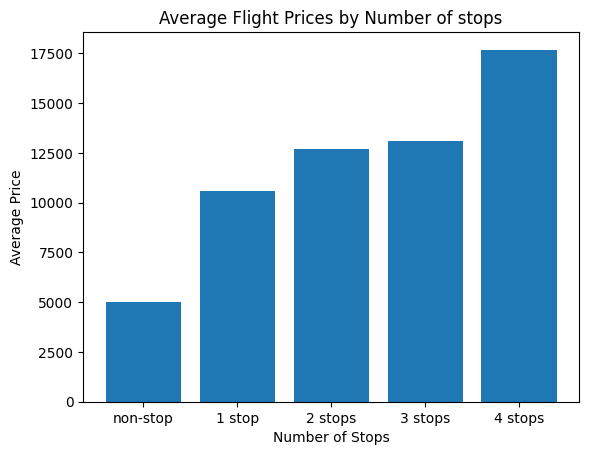

In [35]:
## Average Flight Prices by Number of stops
stops = data_train.groupby('Total_Stops')['Price'].mean().round(0).sort_values(ascending= True)
plt.bar(stops.index, stops.values)
plt.title("Average Flight Prices by Number of stops")
plt.xlabel("Number of Stops")
plt.ylabel("Average Price")
plt.show()

In [36]:
# Feature Engineering

In [37]:
## As there are two null values, we drop them
data_train.dropna(inplace = True)

In [38]:
## Checking Null values after dropping them
data_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [39]:
## Extraction

In [40]:
# Extracting Departure hour from Departure Time
data_train["Depart_hour"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

In [41]:
# Extracting Departure minutes from Departure Time
data_train["Depart_min"] = pd.to_datetime(data_train["Dep_Time"]).dt.hour

In [42]:
# Extracting Arrival hour from Arrival Time
data_train["Arrival_hour"] = pd.to_datetime(data_train["Arrival_Time"]).dt.hour

In [43]:
# Extracting Departure minutes from Departure Time
data_train["Arrival_min"] = pd.to_datetime(data_train["Arrival_Time"]).dt.hour

In [44]:
# Extracting day of Date_of_Journey
data_train["Day_of_Journey"] = pd.to_datetime(data_train["Date_of_Journey"], format="%d/%m/%Y").dt.day

In [45]:
# Extracting Month of Date_of_Journey
data_train["Month_of_Journey"] = pd.to_datetime(data_train["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [46]:
## Dropping the attributes

In [47]:
##  Hour and min are extracted from Dep_Time, so we drop the attribute "Dep_Time"
data_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [48]:
##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [49]:
##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [50]:
## Displaying attributes
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_hour,Depart_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,22,1,1,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,13,13,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,4,4,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,18,23,23,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,16,21,21,1,3


In [51]:
# Duration is differnce between Departure Time and Arrival Time

# Converting "Duration" into list and mins and adding "0m" and "0h", if required
duration =list(data_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extracting hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    #  Extracting only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   

In [52]:
## Adding duration_hours and duration_mins list to data dataframe

data_train["Duration_hours"] = duration_hours
data_train["Duration_mins"] = duration_mins

In [53]:
data_train["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [54]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=data_train[['Airline']]
Airline=pd.get_dummies(Airline,  drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [55]:
data_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [56]:
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source=data_train[['Source']]
Source=pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [57]:
data_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [58]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination=data_train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first=True)

In [59]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [60]:
data_train=pd.concat([data_train, Airline, Source, Destination], axis=1)

In [61]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_hour,Depart_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,16,...,0,0,0,0,0,0,0,0,0,1


In [62]:
data_train["Additional_Info"]

0        No info
1        No info
2        No info
3        No info
4        No info
          ...   
10678    No info
10679    No info
10680    No info
10681    No info
10682    No info
Name: Additional_Info, Length: 10682, dtype: object

In [63]:
data_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [64]:
data_train["Total_Stops"]

0        non-stop
1         2 stops
2         2 stops
3          1 stop
4          1 stop
           ...   
10678    non-stop
10679    non-stop
10680    non-stop
10681    non-stop
10682     2 stops
Name: Total_Stops, Length: 10682, dtype: object

In [65]:
data_train["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [66]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [67]:
data_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Depart_hour,Depart_min,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,22,22,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,5,5,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,9,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,18,18,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,16,16,...,0,0,0,0,0,0,0,0,0,1


In [68]:
## Dropping attribute Duration
data_train.drop(["Duration"], axis = 1, inplace = True)

In [69]:
## As many are no info,we drop it, additional info attribute
data_train.drop(["Additional_Info"], axis = 1, inplace = True)

In [70]:
## As Total_Stops and Route are related, we drop Route Attribute
data_train.drop(["Route"], axis = 1, inplace = True)

In [71]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [72]:
## Printing the name of attributes
print("The name of columns are:", data_train.columns)

The name of columns are: Index(['Total_Stops', 'Price', 'Depart_hour', 'Depart_min', 'Arrival_hour',
       'Arrival_min', 'Day_of_Journey', 'Month_of_Journey', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [73]:
data_train.corr()

,Total_Stops,Price,Depart_hour,Depart_min,Arrival_hour,Arrival_min,Day_of_Journey,Month_of_Journey,Duration_hours,Duration_mins,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Total_Stops,1.000000,0.603897,-0.061476,-0.061476,0.038140,0.038140,-0.009451,0.054383,0.739916,-0.136706,...,-0.020459,-0.234758,0.490170,0.032761,-0.260752,0.490170,-0.447390,-0.260752,-0.234758,-0.015302
Price,0.603897,1.000000,0.006799,0.006799,0.024244,0.024244,-0.153774,-0.103643,0.508778,-0.124855,...,-0.000454,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Depart_hour,-0.061476,0.006799,1.000000,1.000000,0.005180,0.005180,0.002170,0.039127,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Depart_min,-0.061476,0.006799,1.000000,1.000000,0.005180,0.005180,0.002170,0.039127,0.002869,-0.023707,...,-0.003375,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Arrival_hour,0.038140,0.024244,0.005180,0.005180,1.000000,1.000000,-0.003245,-0.003927,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,0.038140,0.024244,0.005180,0.005180,1.000000,1.000000,-0.003245,-0.003927,0.055276,-0.118309,...,0.000776,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Day_of_Journey,-0.009451,-0.153774,0.002170,0.002170,-0.003245,-0.003245,1.000000,-0.038359,-0.022059,-0.008940,...,-0.020115,0.006611,0.100088,-0.060558,-0.014030,0.100088,0.002632,-0.014030,0.006611,-0.075254
Month_of_Journey,0.054383,-0.103643,0.039127,0.039127,-0.003927,-0.003927,-0.038359,1.000000,0.016141,-0.040897,...,-0.019797,0.005650,0.139222,0.087177,-0.039352,0.139222,0.090490,-0.039352,0.005650,-0.453685
Duration_hours,0.739916,0.508778,0.002869,0.002869,0.055276,0.055276,-0.022059,0.016141,1.000000,-0.126468,...,-0.016268,-0.186668,0.299819,0.123524,-0.233326,0.299819,-0.346192,-0.233326,-0.186668,0.004052
Duration_mins,-0.136706,-0.124855,-0.023707,-0.023707,-0.118309,-0.118309,-0.008940,-0.040897,-0.126468,1.000000,...,0.004952,-0.098823,-0.154126,0.013761,-0.018761,-0.154126,0.218207,-0.018761,-0.098823,0.079866


In [74]:
## Printing the number of rows and columns 
print("The number of rows and columns are:",data_train.shape)

The number of rows and columns are: (10682, 30)


# Test Data

In [75]:
## Data Egestion
data_test = pd.read_excel(r"C:/Users/nawin/air_Testset.xlsx")

In [76]:
## printing first 5 rows
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [77]:
##  Listing the names of columns
data_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [78]:
## Information on dataset
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [79]:
## Checking Null values
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [80]:
## Extraction

In [81]:
## Extracting Departure hour from Departure Time
data_test["Depart_hour"] = pd.to_datetime(data_test["Dep_Time"]).dt.hour

In [82]:
## Extracting Departure min from Departure Time
data_test["Depart_min"] = pd.to_datetime(data_test["Dep_Time"]).dt.minute

In [83]:
## Extracting Arrival hour from Arrival Time
data_test["Arrival_hour"] = pd.to_datetime(data_test.Arrival_Time).dt.hour

In [84]:
## Extracting Arrival min from Arrival Time
data_test["Arrival_min"] = pd.to_datetime(data_test.Arrival_Time).dt.minute

In [85]:
## Extracting day of Date_of_Journey
data_test["Day_of_Journey"] = pd.to_datetime(data_test.Date_of_Journey, format="%d/%m/%Y").dt.day

In [86]:
## Extracting day of Date_of_Journey
data_test["Month_of_Journey"] = pd.to_datetime(data_test["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [87]:
## Dropping the attributes

In [88]:
##  Hour and min are extracted from Dep_Time, so we drop the attribute "Dep_Time"
data_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [89]:
##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [90]:
##  Date and month are extracted from Date_of_Journey, so we drop the attribute "Date_of_Journey"
data_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [91]:
# Duration is differnce between Departure Time and Arrival Time

# Converting "Duration" into list and mins and adding "0m" and "0h", if required
duration =list(data_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    # Extracting hours from duration
    duration_hours.append(int(duration[i].split(sep = "h")[0]))  
    #  Extracting only minutes from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [92]:
## Adding duration_hours and duration_mins list to data dataframe

data_test["Duration_hours"] = duration_hours
data_test["Duration_mins"] = duration_mins

In [93]:
## Encoding of Categorical Data Attributes

In [94]:
data_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [95]:
Airline = pd.get_dummies(data_test["Airline"], drop_first= True)

In [96]:
data_test['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [97]:
Source = pd.get_dummies(data_test["Source"], drop_first= True)

In [98]:
data_test['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [99]:
Destination = pd.get_dummies(data_test["Destination"], drop_first = True)

In [100]:
data_test["Additional_Info"]

0                           No info
1                           No info
2       In-flight meal not included
3                           No info
4                           No info
                   ...             
2666                        No info
2667                        No info
2668                        No info
2669                        No info
2670                        No info
Name: Additional_Info, Length: 2671, dtype: object

In [101]:
data_test["Route"]

0       DEL → BOM → COK
1       CCU → MAA → BLR
2       DEL → BOM → COK
3       DEL → BOM → COK
4             BLR → DEL
             ...       
2666    CCU → DEL → BLR
2667          CCU → BLR
2668    DEL → BOM → COK
2669    DEL → BOM → COK
2670    DEL → BOM → COK
Name: Route, Length: 2671, dtype: object

In [102]:
data_test["Total_Stops"]

0         1 stop
1         1 stop
2         1 stop
3         1 stop
4       non-stop
          ...   
2666      1 stop
2667    non-stop
2668      1 stop
2669      1 stop
2670      1 stop
Name: Total_Stops, Length: 2671, dtype: object

In [103]:
data_test["Total_Stops"].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [104]:
# As this is case of Ordinal Categorical type we perform LabelEncoder

data_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [105]:
## As many are no info,we drop it, additional info attribute
data_test.drop(["Additional_Info"], axis = 1, inplace = True)

In [106]:
## As Total_Stops and Route are related, we drop Route Attribute
data_test.drop(["Route"], axis = 1, inplace = True)


In [107]:
## Dropping attributes Airline, Source, Destination
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [108]:
## Printing the number of rows and columns 
print("The number of rows and columns are:",data_test.shape)

The number of rows and columns are: (2671, 10)


In [109]:
## Printing the name of attributes
print("The name of columns are:", data_test.columns)

The name of columns are: Index(['Duration', 'Total_Stops', 'Depart_hour', 'Depart_min', 'Arrival_hour',
       'Arrival_min', 'Day_of_Journey', 'Month_of_Journey', 'Duration_hours',
       'Duration_mins'],
      dtype='object')


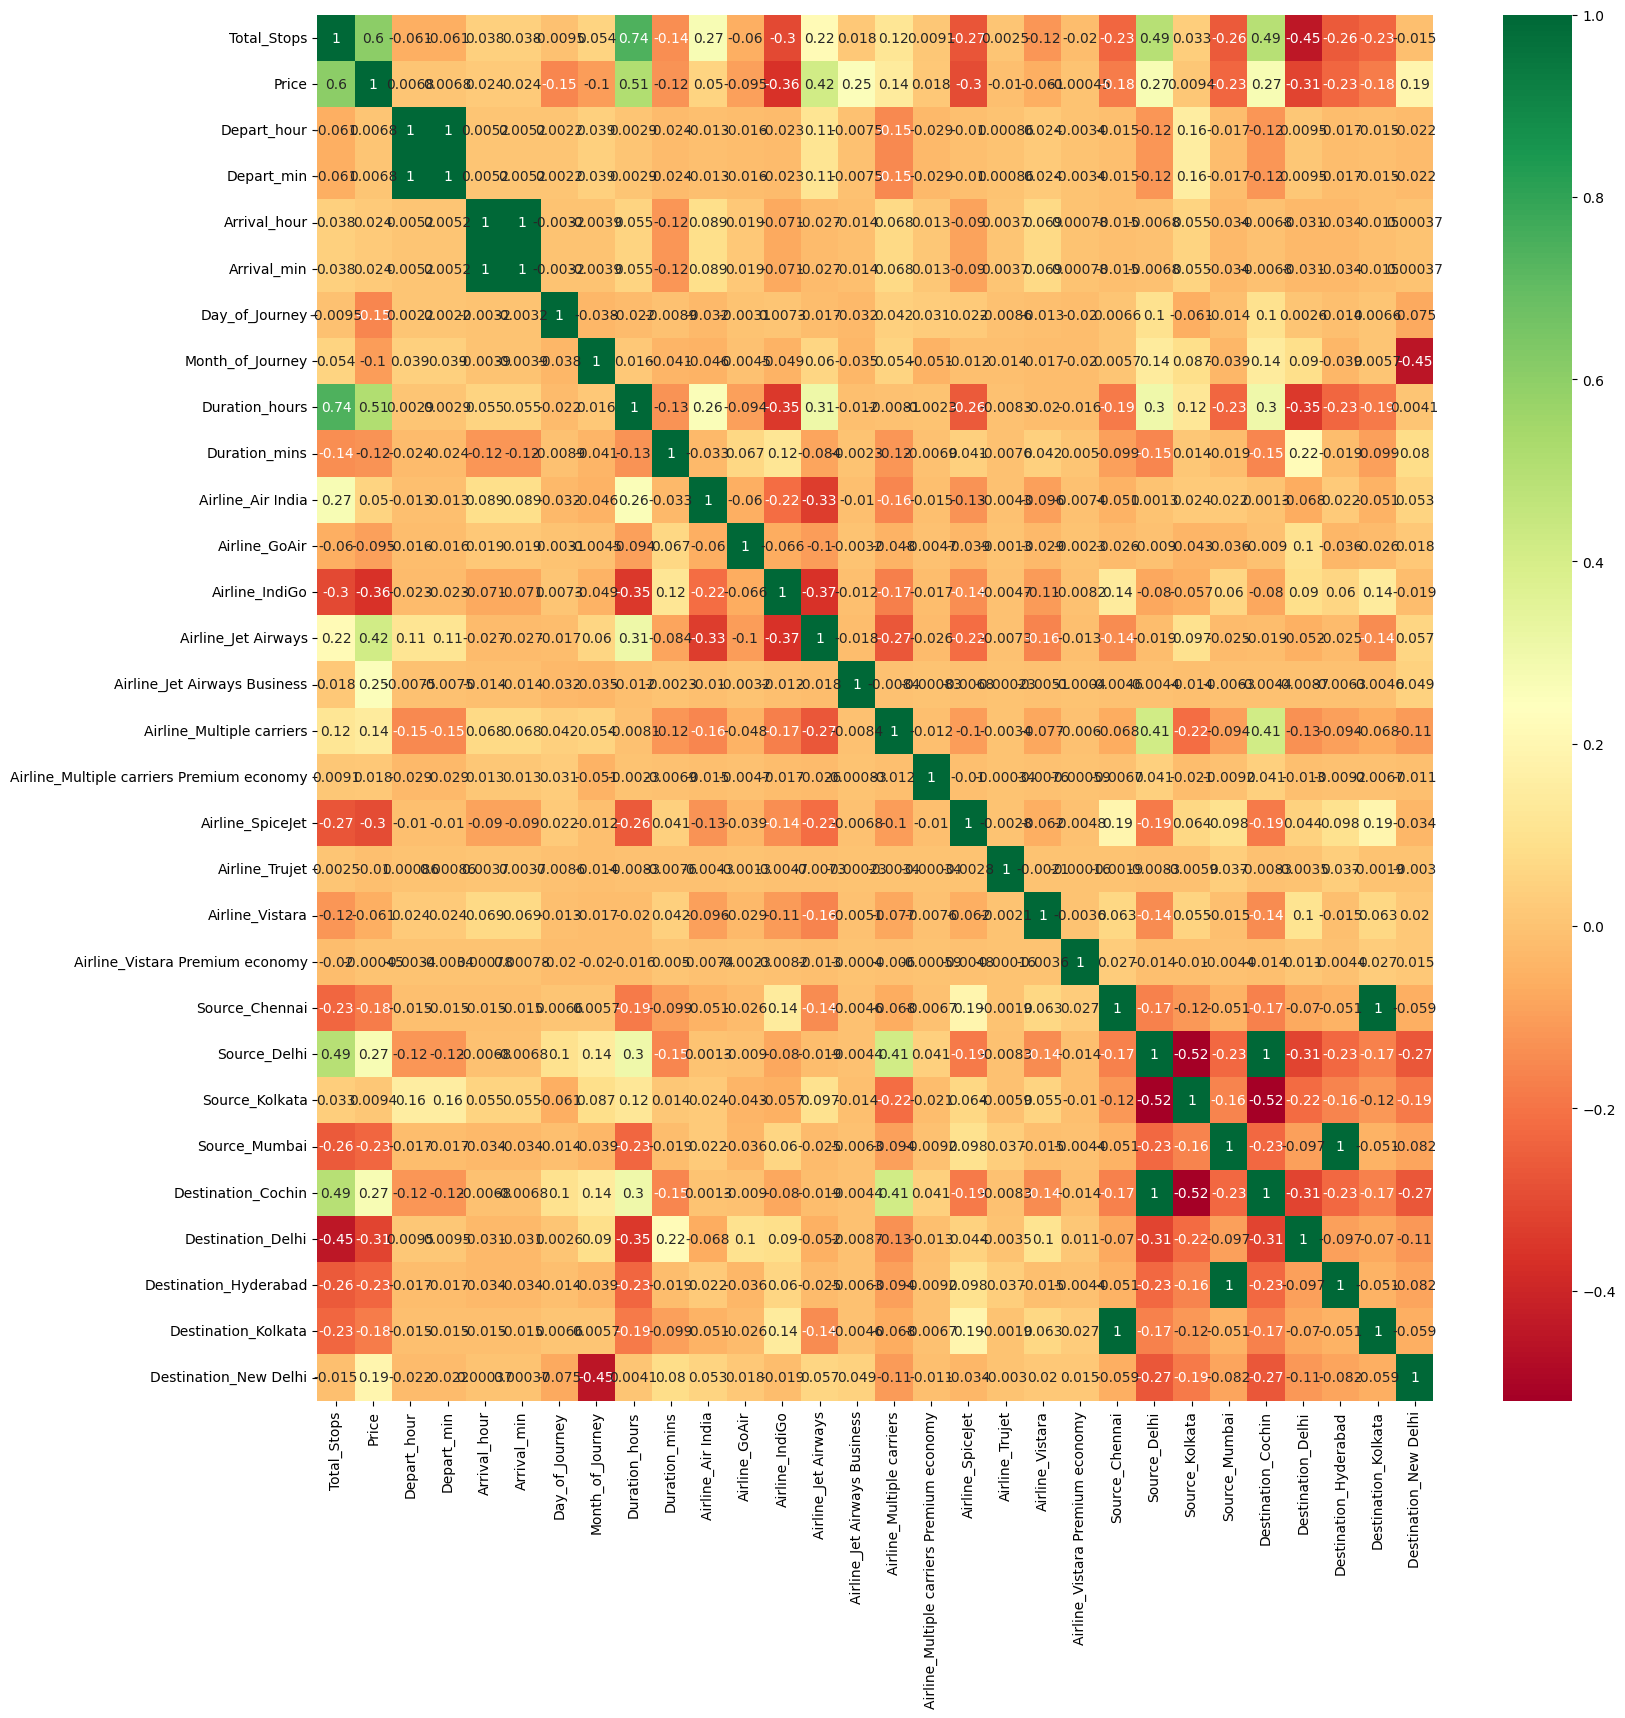

In [110]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

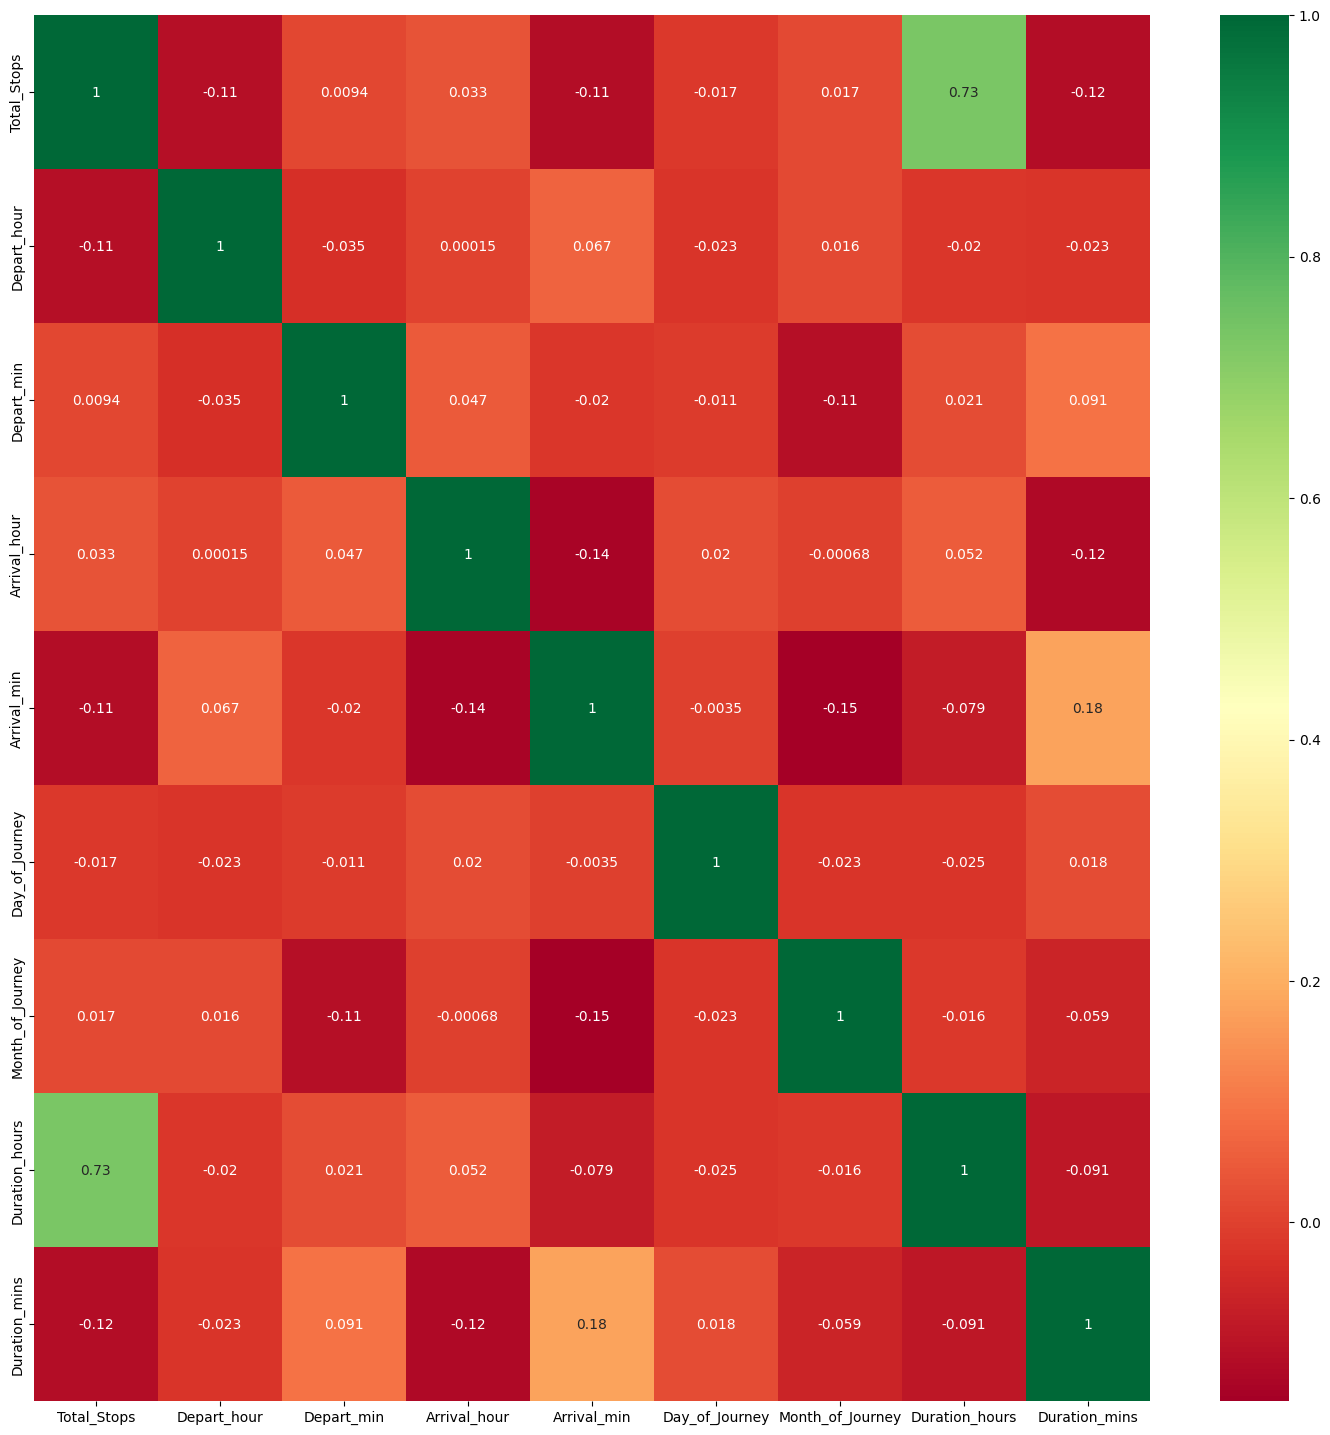

In [111]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_test.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [112]:
## creating independent feacture
X=data_train.drop('Price',axis=1)

In [113]:
## Printing the name of attributes
print("The name of columns are:", X.columns)

The name of columns are: Index(['Total_Stops', 'Depart_hour', 'Depart_min', 'Arrival_hour',
       'Arrival_min', 'Day_of_Journey', 'Month_of_Journey', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


In [114]:
## dependent feature
y=data_train['Price']

In [115]:
## Displaying the rows
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [116]:
## Model Training
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2,random_state=42)

In [117]:
## printing counts
print(f"X_train is {len(X_train)}, y_train is {len(y_train)}")

X_train is 8545, y_train is 8545


In [118]:
## printing counts
print(f"X_test is {len(X_test)}, y_test is {len(y_test)}")

X_test is 2137, y_test is 2137


In [119]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [120]:
print(selection.feature_importances_)

[2.40078704e-01 1.85189969e-02 1.80464118e-02 2.15384638e-02
 2.26174227e-02 1.44335050e-01 5.50745195e-02 1.01789285e-01
 2.68511685e-02 8.42618188e-03 1.88401588e-03 1.62367081e-02
 1.49528651e-01 6.72951938e-02 2.14356681e-02 8.91309809e-04
 3.01109266e-03 1.24858509e-04 5.14910018e-03 6.85287735e-05
 4.43033999e-04 1.05205839e-02 3.04424249e-03 5.85313975e-03
 6.04385980e-03 1.92503224e-02 6.58196576e-03 4.79675978e-04
 2.48818455e-02]


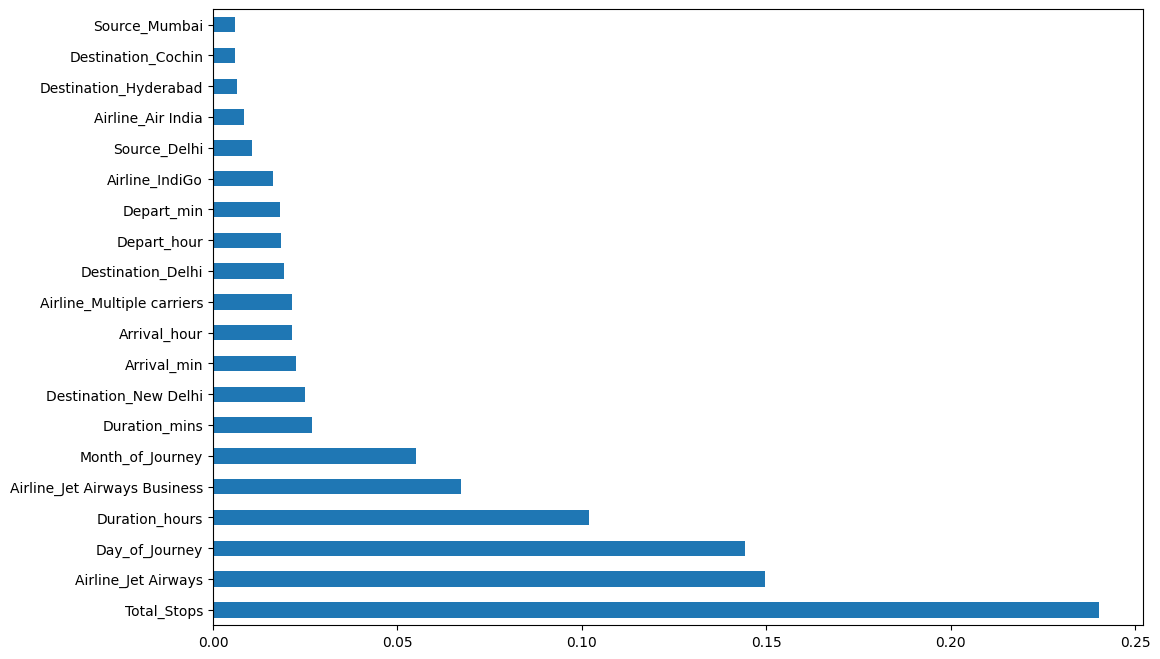

In [121]:
## plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [122]:
## Printing the number of rows and columns

In [123]:
print("The number of rows and columns in X_train: ",X_train.shape)

The number of rows and columns in X_train:  (8545, 29)


In [124]:
print("The number of rows and columns in X_test: ",X_test.shape)

The number of rows and columns in X_test:  (2137, 29)


In [125]:
print("The number rows in y_train: ",y_train.shape)

The number rows in y_train:  (8545,)


In [126]:
print("The number of rows  in y_test: ",y_test.shape)

The number of rows  in y_test:  (2137,)


In [127]:
## Defining Function model_metrics 

def model_metrics(model):
    print(f'Training Data score {model.score(X_train, y_train)}')
    print(f'Testing Data score {model.score(X_test, y_test)}')
    print("MAE is :" , metrics.mean_absolute_error(y_test,model.predict(X_test)))
    print("MSE is :" , metrics.mean_squared_error(y_test,model.predict(X_test)))
    print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test,model.predict(X_test))))

In [128]:
## Linear Regression

In [129]:
## Training of Model
lr = LinearRegression()
lr.fit(X_train, y_train)
ln_test = lr.score(X_test, y_test)
ln_train =lr.score(X_train,y_train)
model_metrics(lr)

Training Data score 0.6238275810087294
Testing Data score 0.6191755395250379
MAE is : 1972.5427850447472
MSE is : 8211358.4663796555
RMSE is : 2865.546800591408


In [130]:
## Predicting Test Data
y_ln = lr.predict(X_test)

In [131]:
y_ln

array([13370.16210938,  7683.16210938,  9679.16210938, ...,
        6675.16210938, 11179.16210938, 11431.16210938])

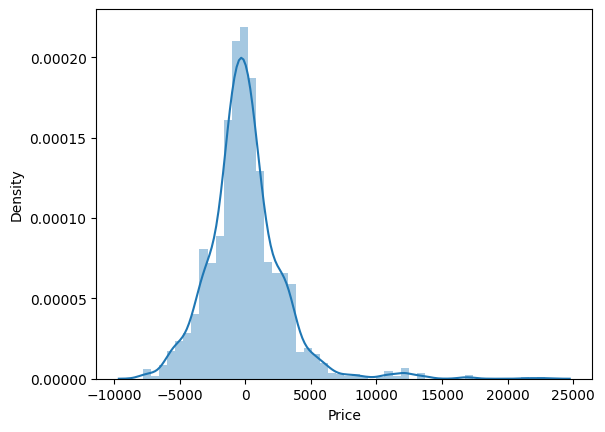

In [132]:
## Plotting  Normal distribution of Prediction with Test Data
sns.distplot(y_test-y_ln)
plt.show()

Text(0, 0.5, 'Actual Airline Prices')

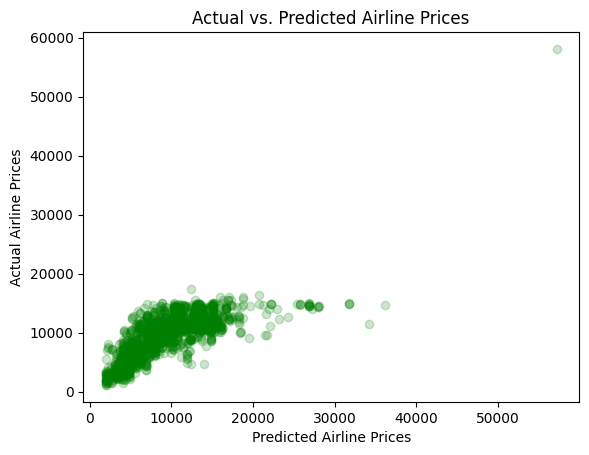

In [133]:
## Plotting Scatter Plot
plt.scatter(y_test,y_ln,alpha =0.2,color="green")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [134]:
## R square of Linear Regression
rsquare_ln=metrics.r2_score(y_test, y_ln)
rsquare_ln

0.6191755395250379

In [135]:
##  Adjusted R Square
Adjutr_ln=1-(1-rsquare_ln)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adjutr_ln

0.6139340068464552

In [136]:
## Ridge Regression

In [137]:
## Training of Model
rid = Ridge()
rid.fit(X_train, y_train)
rid_test = rid.score(X_test, y_test)
rid_train =rid.score(X_train,y_train)
model_metrics(rid)

Training Data score 0.6221174196075294
Testing Data score 0.6188255400870789
MAE is : 1976.8324732051724
MSE is : 8218905.173974353
RMSE is : 2866.8632987944075


In [138]:
## Prediction from the test data
rid_pred=rid.predict(X_test)
print(rid_pred)

[13309.1319962   7644.32867141  9674.75181033 ...  7010.35636753
 11211.13580192 11480.50786702]


Text(0, 0.5, 'Test Predicted Data')

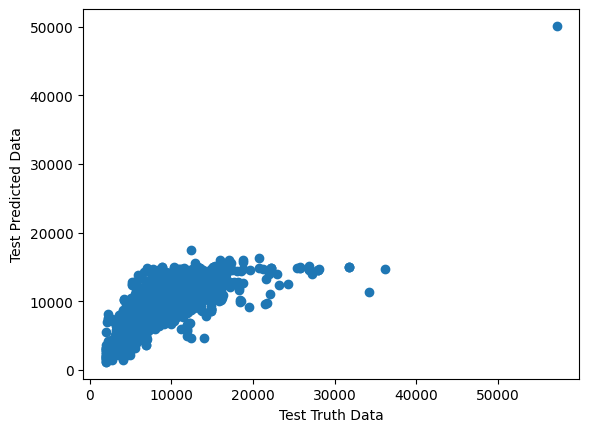

In [139]:
plt.scatter(y_test,rid_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [140]:
## printing  the intercept
print(rid.intercept_)

7592.113958778362


In [141]:
## residuals
residuals=y_test-rid_pred
residuals

6075     3345.868004
3544    -2685.328671
9291     -487.751810
5032      121.566858
2483     1627.290722
            ...     
9797    -1908.554381
9871     -824.023486
10063     441.643632
8802    -2387.135802
8617     2670.492133
Name: Price, Length: 2137, dtype: float64

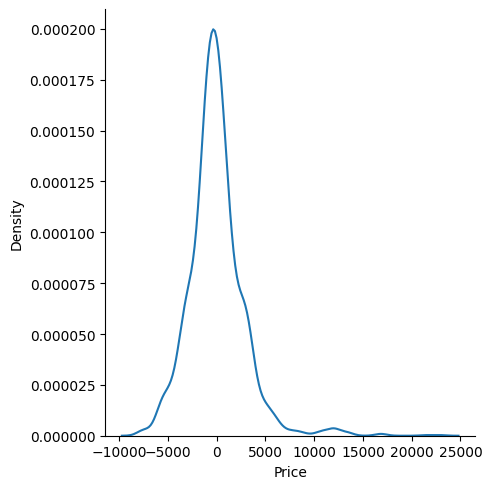

In [142]:
sns.displot(residuals,kind="kde")

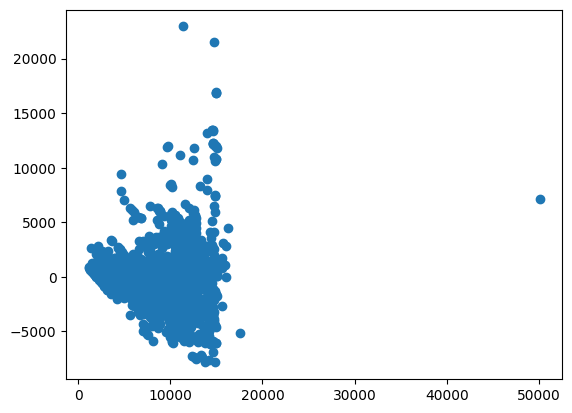

In [143]:
## SCatter plot with predictions and residual
## uniform distribution
plt.scatter(rid_pred,residuals)

In [144]:
# R square and adjusted R square
## computing R Square 

rid_r2=r2_score(y_test,rid_pred)
print (rid_r2)

0.6188255400870789


In [145]:
##  Adjusted R Square
adjrid_r2=1-(1-rid_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
adjrid_r2

0.6135791901404843

In [146]:
 ## Lasso Regression

In [147]:
## Training of Model
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_test = lasso.score(X_test, y_test)
lasso_train =lasso.score(X_train,y_train)
model_metrics(lasso)

Training Data score 0.6236759632030923
Testing Data score 0.6193534504725628
MAE is : 1973.7143530284443
MSE is : 8207522.34050844
RMSE is : 2864.8773691919937


In [148]:
## printing  the intercept
print(lasso.intercept_)

7578.450275950083


In [149]:
## Prediction from the test data
lasso_pred=lasso.predict(X_test)
print(lasso_pred)

[13285.98442864  7618.39266873  9647.66799251 ...  7026.72444482
 11227.71618886 11474.55262099]


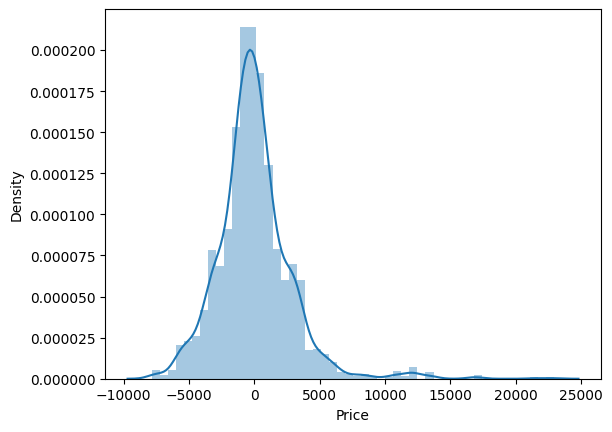

In [150]:
## Plotting  Normal distribution of Prediction with Test Data
sns.distplot(y_test-lasso_pred)
plt.show()

Text(0, 0.5, 'Test Predicted Data')

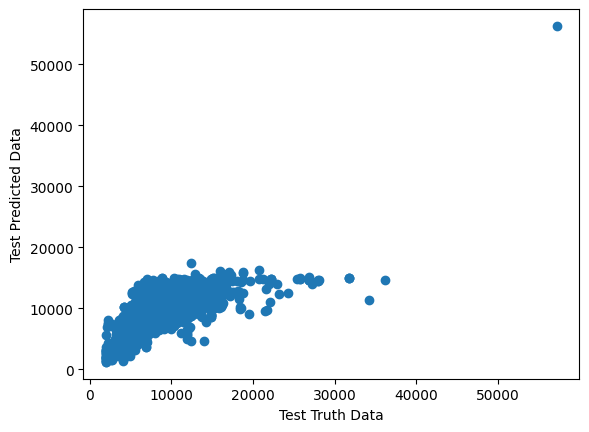

In [151]:
plt.scatter(y_test,lasso_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [152]:
## residuals
residuals=y_test-lasso_pred
residuals

6075     3369.015571
3544    -2659.392669
9291     -460.667993
5032      113.710934
2483     1640.488315
            ...     
9797    -1919.137792
9871     -831.742980
10063     425.275555
8802    -2403.716189
8617     2676.447379
Name: Price, Length: 2137, dtype: float64

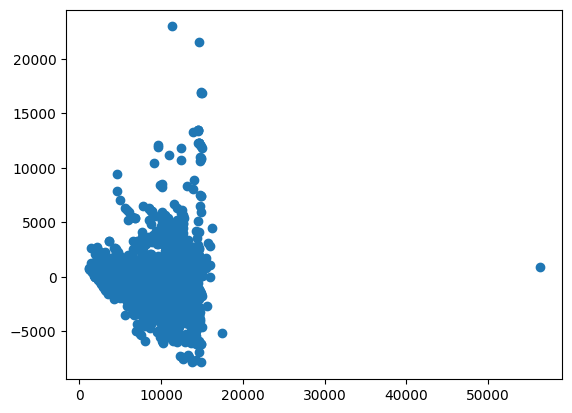

In [153]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(lasso_pred,residuals)

In [154]:
## computing R Square 
from sklearn.metrics import r2_score
lasso_r2=r2_score(y_test,lasso_pred)
print (lasso_r2)

0.6193534504725628


In [155]:
##  Adjusted R Square
lasso_adjr2=1-(1-lasso_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
lasso_adjr2

0.6141143664971022

In [156]:
## ElasticNet Regression

In [157]:
## Training of Model
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
elasticnet_test = elasticnet.score(X_test, y_test)
elasticnet_train =elasticnet.score(X_train,y_train)
model_metrics(elasticnet)

Training Data score 0.43279417525098896
Testing Data score 0.43304362691020626
MAE is : 2427.1329583154115
MSE is : 12224745.249904614
RMSE is : 3496.39031715634


In [158]:
## printing  the intercept
print(elasticnet.intercept_)

9350.463112192534


In [159]:
## Prediction from the test data
elasticnet_pred=elasticnet.predict(X_test)
print(elasticnet_pred)

[10068.86719104  9790.8206942   9269.58897772 ...  9619.3147858
 10001.91232368  8867.90728027]


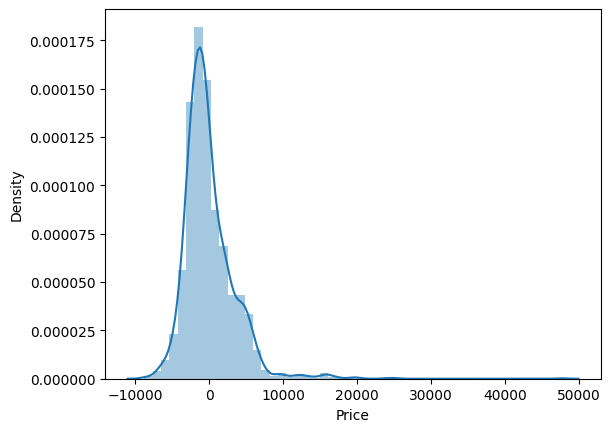

In [160]:
## Plotting  Normal distribution of Prediction with Test Data
sns.distplot(y_test-elasticnet_pred)
plt.show()

Text(0, 0.5, 'Test Predicted Data')

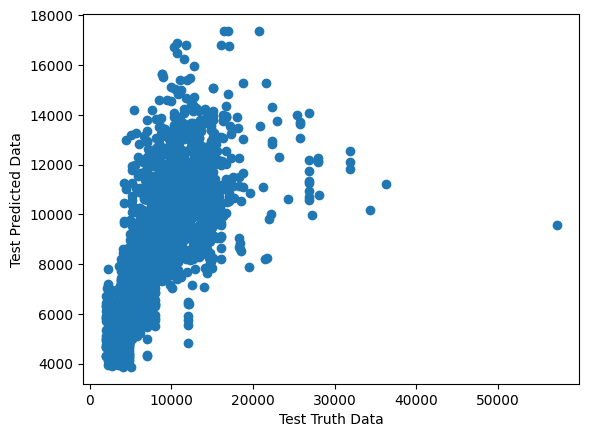

In [161]:
plt.scatter(y_test,elasticnet_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [162]:
## residuals
residuals=y_test-elasticnet_pred
residuals

6075     6586.132809
3544    -4831.820694
9291      -82.588978
5032    -1149.184218
2483     4255.316149
            ...     
9797    -1530.673244
9871    -2757.401337
10063   -2167.314786
8802    -1177.912324
8617     5283.092720
Name: Price, Length: 2137, dtype: float64

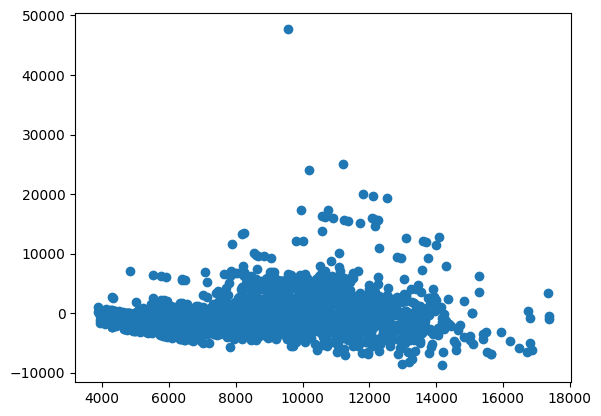

In [163]:
## SCatter plot with predictions and residual
##uniform distribution
plt.scatter(elasticnet_pred,residuals)

In [164]:
## computing R Square 
from sklearn.metrics import r2_score
elasticnet_r2=r2_score(y_test,elasticnet_pred)
print (elasticnet_r2)

0.43304362691020626


In [165]:
##  Adjusted R Square
elasticnetadjr2=1-(1-elasticnet_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
elasticnetadjr2

0.425240240664547

In [166]:
## Decision Tree Regressor

In [167]:
## Training of the Model 

dt=DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)
dt_test = dt.score(X_test, y_test)
dt_train =dt.score(X_train,y_train)
model_metrics(dt)

Training Data score 0.9685095834941612
Testing Data score 0.7112487112149346
MAE is : 1352.3167602558103
MSE is : 6226071.552457885
RMSE is : 2495.20972113726


In [168]:
## Predicting Test Data
y_dt = dt.predict(X_test)
y_dt

array([16840.,  8759.,  9187., ...,  7174., 13339., 14335.])

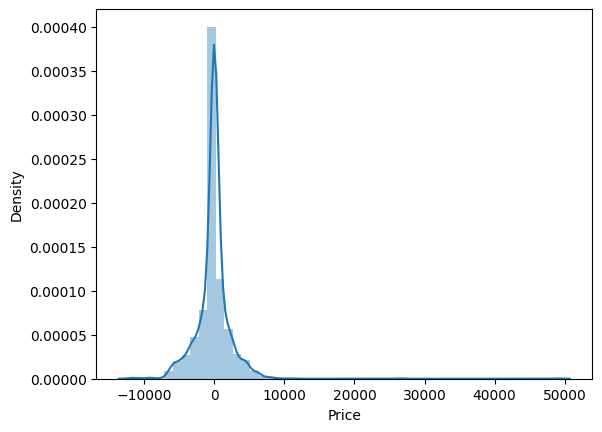

In [169]:
## Plotting  Normal distribution of Prediction with Test Data
sns.distplot(y_test-y_dt)
plt.show()

Text(0, 0.5, 'Actual Airline Prices')

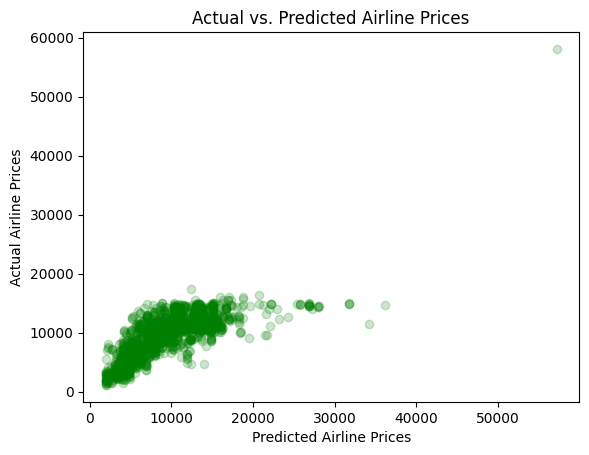

In [170]:
## Plotting Scatter Plot
plt.scatter(y_test,y_ln,alpha =0.2,color="green")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [171]:
## R square of Decision Tree Regressor
rsquare_dt=metrics.r2_score(y_test, y_dt)
rsquare_dt

0.7112487112149346

In [172]:
## Random Forest Regressor

In [173]:
## Training of Model
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_test = rf.score(X_test, y_test)
rf_train =rf.score(X_train,y_train)
model_metrics(rf)

Training Data score 0.9520965904267706
Testing Data score 0.7922598963713673
MAE is : 1201.432206982172
MSE is : 4479303.815227785
RMSE is : 2116.4365842679495


In [174]:
## Prediction of Test Data
y_rf = rf.predict(X_test)
y_rf

array([16818.65      ,  5818.11      ,  8874.61      , ...,
        6859.52      , 13141.51266667, 12910.93816667])

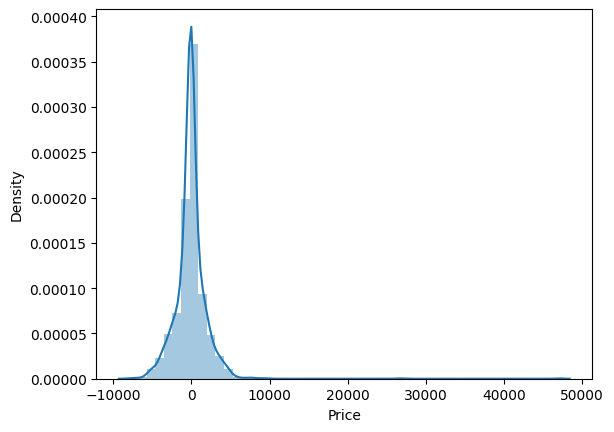

In [175]:
## Normal distribution of Prediction with Test Data
sns.distplot(y_test-y_rf)
plt.show()

Text(0, 0.5, 'Actual Airline Prices')

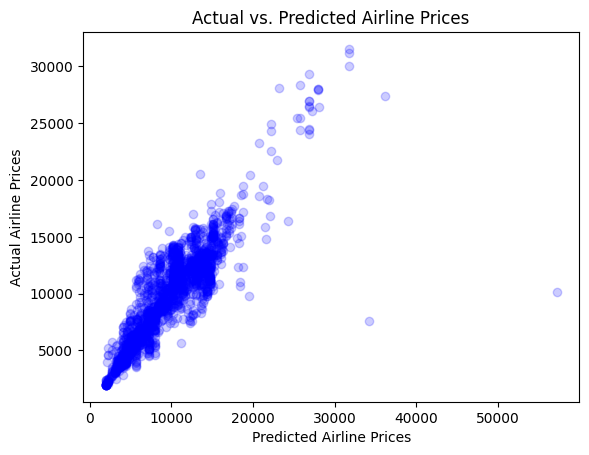

In [176]:
## Scatter plot 
plt.scatter(y_test,y_rf,alpha =0.2,color="Blue")
plt.title('Actual vs. Predicted Airline Prices')
plt.xlabel('Predicted Airline Prices')
plt.ylabel('Actual Airline Prices')

In [177]:
## R square of Random Forest Regressor
rsquare_rf=metrics.r2_score(y_test, y_rf)
rsquare_rf

0.7922598963713673

In [178]:
## Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [179]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [180]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [181]:
## Training of Model
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [182]:
## The best estimator across ALL searched params
rf_random.best_estimator_

RandomForestRegressor(max_depth=20, max_features='auto', min_samples_split=15,
                      n_estimators=700)

In [183]:
## The best parameters across ALL searched params
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [184]:
## Printing predicted Test Data
prediction = rf_random.predict(X_test)
prediction

array([17574.30420479,  6177.24626913,  8676.74386385, ...,
        6491.0461044 , 12336.45229824, 12507.598014  ])

In [185]:
## R Square value of Random Forest Regressor Model After Hyperparameter Tunning
rsquare_htrf=metrics.r2_score(y_test, prediction)
rsquare_htrf

0.8090030883102888

In [186]:
## Errors of Random Forest Regressor Model After Hyperparameter Tunning
print("MAE is :" , metrics.mean_absolute_error(y_test,prediction))
print("MSE is :" , metrics.mean_squared_error(y_test,prediction))
print("RMSE is :" , np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE is : 1193.4873118040384
MSE is : 4118286.1675945073
RMSE is : 2029.3560967938838


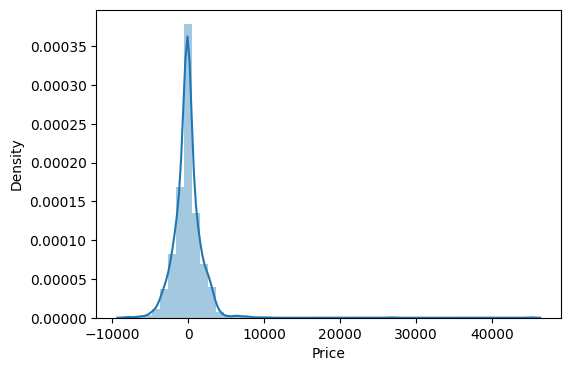

In [187]:
## Error Graph of Tuned Model
plt.figure(figsize = (6,4))
sns.distplot(y_test-prediction)
plt.show()

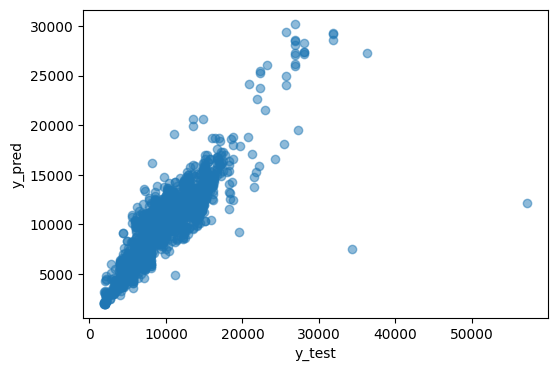

In [188]:
## Scatter plot
plt.figure(figsize = (6,4))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [189]:
## Dataframe of Predicted Price Vs Actual Price
data_test_df = pd.DataFrame({"Predicted Price" : rf.predict(X_test),"Actual Price" : y_test}).reset_index(drop = True)
data_test_df

,Predicted Price,Actual Price
0,16818.650000,16655
1,5818.110000,4959
2,8874.610000,9187
3,3654.420000,3858
4,14954.127095,12898
...,...,...
2132,11979.677667,7408
2133,5078.620000,4622
2134,6859.520000,7452
2135,13141.512667,8824


In [190]:
## Saving The Final Model

In [191]:
# Saving the model

# File to store the data
file = open('rf_flightfare_prediction.pkl', 'wb')

# dumping information to that file
pkl.dump(rf, file)

In [192]:
# open the model
model = open('rf_flightfare_prediction.pkl','rb')
rf_flightfare_prediction = pkl.load(model)

In [193]:
## Prediction
y_predict = rf_flightfare_prediction.predict(X_test)
y_predict

array([16818.65      ,  5818.11      ,  8874.61      , ...,
        6859.52      , 13141.51266667, 12910.93816667])

In [194]:
## R Square 
metrics.r2_score(y_test, y_predict)

0.7922598963713673

In [195]:
## Adjusted R squares and Errors of models

In [196]:
## Linear Regression -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [197]:
Adjust_r_Ln=1 - (1-rsquare_ln)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [198]:
MAE_ln=(metrics.mean_absolute_error(y_test,lr.predict(X_test)))

In [199]:
MSE_ln =(metrics.mean_squared_error(y_test,lr.predict(X_test)))

In [200]:
RMSE_ln=(np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))

In [201]:
## Lasso Regression -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [202]:
Adjust_r_La=1 - (1-rsquare_ln)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [203]:
MAE_las=(metrics.mean_absolute_error(y_test,lasso.predict(X_test)))

In [204]:
MSE_las =(metrics.mean_squared_error(y_test,lasso.predict(X_test)))

In [205]:
RMSE_las=(np.sqrt(metrics.mean_squared_error(y_test,lasso.predict(X_test))))

In [206]:
## Ridge Regression -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [207]:
Adjust_r_rid=1 - (1-rsquare_ln)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [208]:
MAE_rid=(metrics.mean_absolute_error(y_test,rid.predict(X_test)))

In [209]:
MSE_rid =(metrics.mean_squared_error(y_test,rid.predict(X_test)))

In [210]:
RMSE_rid=(np.sqrt(metrics.mean_squared_error(y_test,rid.predict(X_test))))

In [211]:
# Elasticnet Regression -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [212]:
Adjust_r_EN=1 - (1-rsquare_ln)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [213]:
MAE_EN=(metrics.mean_absolute_error(y_test,elasticnet.predict(X_test)))

In [214]:
MSE_EN =(metrics.mean_squared_error(y_test,elasticnet.predict(X_test)))

In [215]:
RMSE_EN=(np.sqrt(metrics.mean_squared_error(y_test,elasticnet.predict(X_test))))

In [216]:
# Decision Tree Regressor -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [217]:
Adjust_r_dt=1 - (1-rsquare_dt)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [218]:
MAE_dt=(metrics.mean_absolute_error(y_test,dt.predict(X_test)))

In [219]:
MSE_dt =(metrics.mean_squared_error(y_test,dt.predict(X_test)))

In [220]:
RMSE_dt=(np.sqrt(metrics.mean_squared_error(y_test,dt.predict(X_test))))

In [221]:
# Random Forest Regressor -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [222]:
Adjust_r_rf=1 - (1-rsquare_rf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [223]:
MAE_rf=(metrics.mean_absolute_error(y_test,rf.predict(X_test)))

In [224]:
MSE_rf =(metrics.mean_squared_error(y_test,rf.predict(X_test)))

In [225]:
RMSE_rf=(np.sqrt(metrics.mean_squared_error(y_test,rf.predict(X_test))))

In [226]:
# Random Forest Regressor after hyperparameter Tunning -Adjusted R2 , Mean Square Error, Mean Absolute Error , Root mean Square Error

In [227]:
Adjust_r_htrf=1 - (1-rsquare_htrf)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [228]:
MAE_htrf=(metrics.mean_absolute_error(y_test,rf_random.predict(X_test)))

In [229]:
MSE_htrf =(metrics.mean_squared_error(y_test,rf_random.predict(X_test)))

In [230]:
RMSE_htrf=(np.sqrt(metrics.mean_squared_error(y_test,rf_random.predict(X_test))))

In [231]:
print("R Square value of Linear regression Model :",((rsquare_ln)*100).round(3),'%')
print("R Square value of ElasticNet regression Model :",((elasticnet_r2)*100).round(3),'%')
print("R Square value of Lasso regression Model :",((lasso_r2)*100).round(3),'%')
print("R Square value of Ridge regression Model :",((rid_r2)*100).round(3),'%')
print("R Square value of Decision Tree regressor Model :",((rsquare_dt)*100).round(3),'%')
print("R Square value of Random Forest Regressor Model Before Hyperparameter Tunning :",((rsquare_rf)*100).round(3),'%')
print("R Square value of Random Forest Regressor Model After Hyperparameter Tunning :",((rsquare_htrf)*100).round(3),'%')

R Square value of Linear regression Model : 61.918 %
R Square value of ElasticNet regression Model : 43.304 %
R Square value of Lasso regression Model : 61.935 %
R Square value of Ridge regression Model : 61.883 %
R Square value of Decision Tree regressor Model : 71.125 %
R Square value of Random Forest Regressor Model Before Hyperparameter Tunning : 79.226 %
R Square value of Random Forest Regressor Model After Hyperparameter Tunning : 80.9 %


In [232]:
## Making a dataframe of r square and adjusted r square values of each model 
Accuracy=pd.DataFrame({'Model Name':['Linear Regression','Decision Tree Regressor','Ridge regression','Lasso regression','ElasticNet regression','Random Forest Regressor Model Before Hyperparameter Tunning'],'R Square Value':[rsquare_ln,rsquare_dt,rid_r2,lasso_r2,elasticnet_r2,rsquare_rf],'Adjusted R square value':[Adjust_r_Ln,Adjust_r_dt,Adjust_r_rid,Adjust_r_La,Adjust_r_EN,Adjust_r_rf],'Training Data Score':[ln_train,dt_train,rid_train,lasso_train,elasticnet_train,rf_train,],'Testing Data Score':[ln_test,dt_test,rid_test,lasso_test,elasticnet_test,rf_test]})
Accuracy

,Model Name,R Square Value,Adjusted R square value,Training Data Score,Testing Data Score
0,Linear Regression,0.619176,0.613934,0.623828,0.619176
1,Decision Tree Regressor,0.711249,0.707274,0.968510,0.711249
2,Ridge regression,0.618826,0.613934,0.622117,0.618826
3,Lasso regression,0.619353,0.613934,0.623676,0.619353
4,ElasticNet regression,0.433044,0.613934,0.432794,0.433044
5,Random Forest Regressor Model Before Hyperpara...,0.792260,0.789401,0.952097,0.792260


In [233]:
## Making a dataframe of r square, adjusted r square and error values of each model 

Models=pd.DataFrame({'Model Name':['Linear Regression','Ridge regression','Lasso regression','ElasticNet regression','Decision Tree Regressor','Random Forest Regressor Model Before Hyperparameter Tunning','Random Forest Regressor Model After Hyperparameter Tunning'],'R Square Value':[rsquare_ln,rid_r2,lasso_r2,elasticnet_r2,rsquare_dt,rsquare_rf,rsquare_htrf],'Adjusted R square value':[Adjust_r_Ln,Adjust_r_rid,Adjust_r_La,Adjust_r_EN,Adjust_r_dt,Adjust_r_rf,Adjust_r_htrf],'Mean Absolute Error':[MAE_ln,MAE_rid,MAE_las,MAE_EN,MAE_dt,MAE_rf,MAE_htrf],'Mean Square Error':[MSE_ln,MSE_rid,MSE_las,MSE_EN,MSE_dt,MSE_rf,MSE_htrf],'Root Mean Square Error':[RMSE_ln,RMSE_rid,RMSE_las, RMSE_EN,RMSE_dt,RMSE_rf,RMSE_htrf]})
Models

,Model Name,R Square Value,Adjusted R square value,Mean Absolute Error,Mean Square Error,Root Mean Square Error
0,Linear Regression,0.619176,0.613934,1972.542785,8.211358e+06,2865.546801
1,Ridge regression,0.618826,0.613934,1976.832473,8.218905e+06,2866.863299
2,Lasso regression,0.619353,0.613934,1973.714353,8.207522e+06,2864.877369
3,ElasticNet regression,0.433044,0.613934,2427.132958,1.222475e+07,3496.390317
4,Decision Tree Regressor,0.711249,0.707274,1352.316760,6.226072e+06,2495.209721
5,Random Forest Regressor Model Before Hyperpara...,0.792260,0.789401,1201.432207,4.479304e+06,2116.436584
6,Random Forest Regressor Model After Hyperparam...,0.809003,0.806374,1193.487312,4.118286e+06,2029.356097


In [234]:
## Conclusion
# The Random Forest Regressor Model After Hyperparameter Tunning is the best model for Flight Fare Prediction
# The Random Forest Regressor model has best R Square value with less Errors(MAE,MSE,RMSE)
# There is minimal difference between r squares of Random Forest Regressor Model before and after hyperparameter tunning